# **Projet 3** - Concevez_Une_Application_Au_Service_De_La_Sante_Publique

## Librairie

In [1]:
import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

## Importation des données

In [2]:
# Import the dataset MAC
# food = "/Users/remi/Documents/FoodFact/foodfact.csv"
# df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [3]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact.csv"
df_food = pd.read_csv(food, sep="\t", low_memory=False)

## Nettoyage du dataset

### Sélection des colonnes utiles

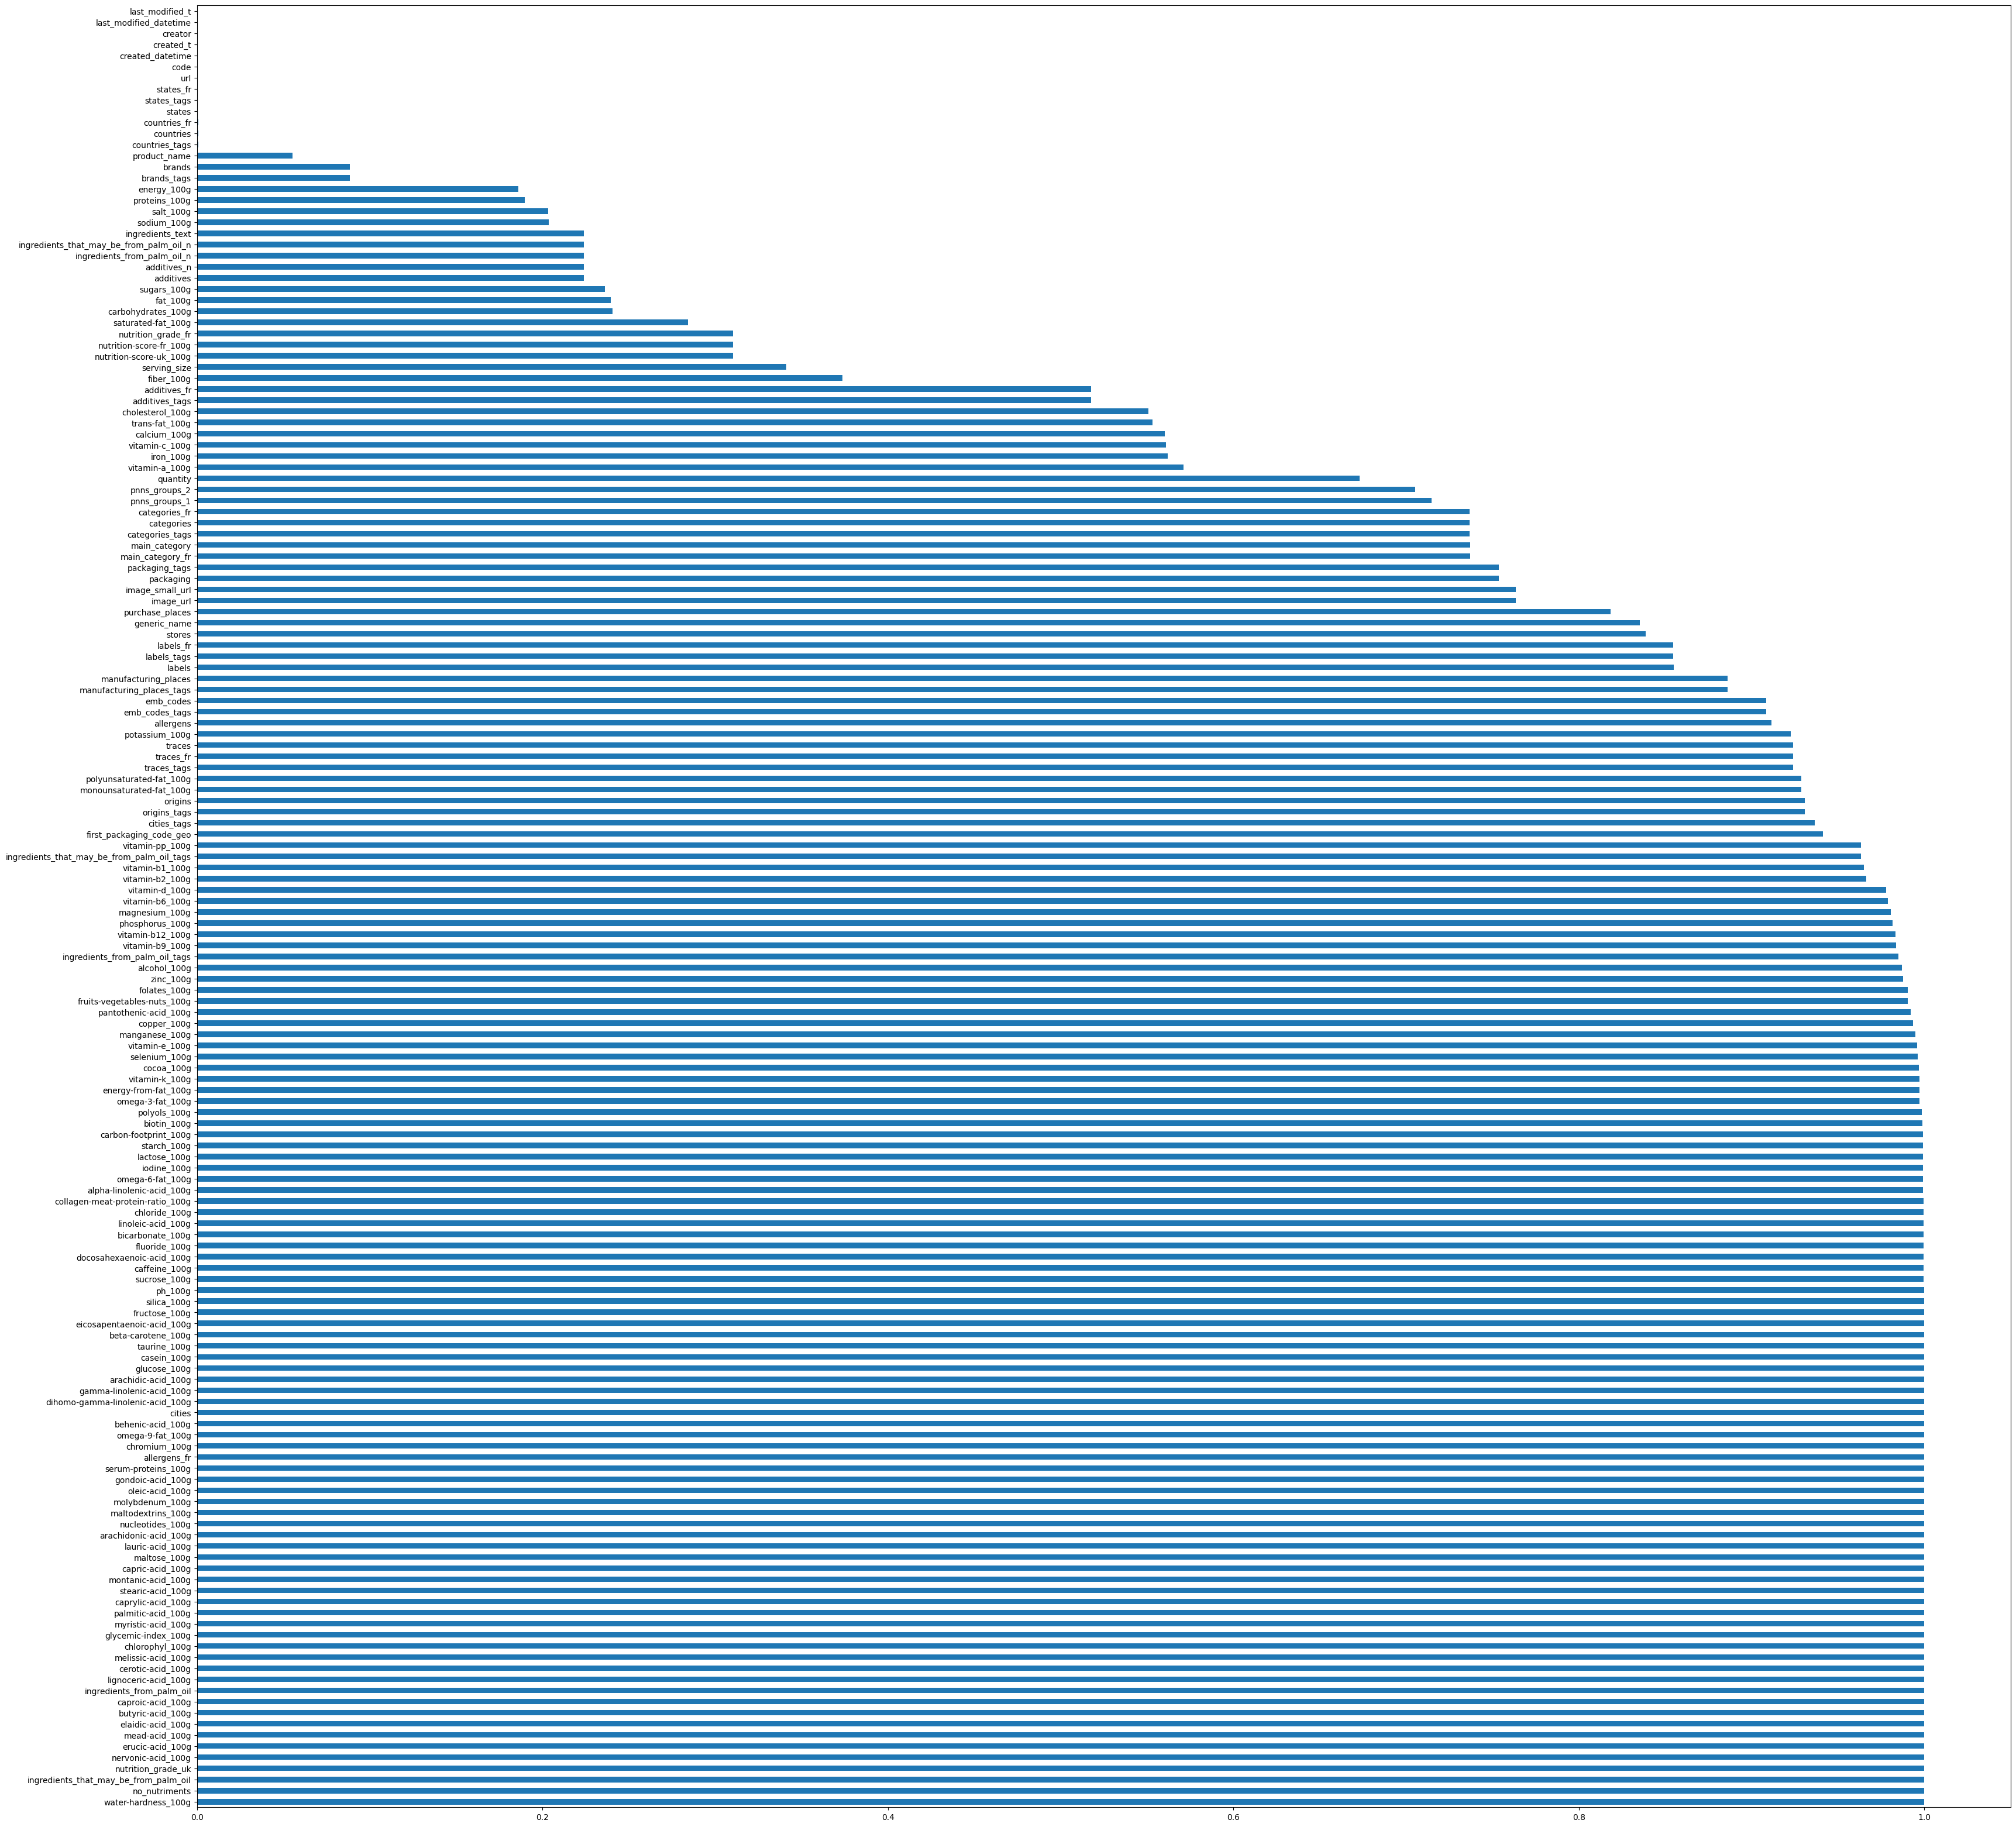

In [4]:
# Observation of zero values (average per column)
plt.figure(figsize=(40,40))
df_food.isna().mean().sort_values(ascending=False).plot.barh()
plt.show()

In [5]:
# Delete columns containing only null values
df_food.dropna(axis=1, how="all", inplace=True)

In [6]:
# Check columns containing < 80% null values and uncontaing "100g"
df_food.loc[:, (df_food.isna().mean() > 0.8) & (~df_food.columns.str.contains("100g"))].columns

Index(['generic_name', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr',
       'traces', 'traces_tags', 'traces_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags'],
      dtype='object')

In [7]:
# Check columns containing < 80% null values and containg "100g"
df_food.loc[:, (df_food.isna().mean() > 0.8) & (df_food.columns.str.contains("100g"))].columns

Index(['energy-from-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g',
       'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g',
       'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g',
       'montanic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'arachidonic-acid_100g', 'gamma-linolenic-acid_100g',
       'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g',
       'oleic-acid_100g', 'gondoic-acid_100g', 'sucrose_100g', 'glucose_100g',
       'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g',
       'starch_100g', 'polyols_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'alcohol_100g', 'beta-carotene_100g',
       'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 

In [8]:
# Check values on allergens column
df_food.loc[df_food["allergens"].notnull(),["code","allergens"]]

,code,allergens
184,0000007730009,"Blé, Beurre, Oeufs, Noisette"
218,0000020424640,"Vollmilchpulver, Vollmilchpulver, Soja, Butter..."
222,0000027533024,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea..."
223,0000027533048,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea..."
239,0000084154071,mostaza
...,...,...
320628,9556156046399,"soja, soja"
320648,9556417639339,blé
320652,9556587103869,blé
320701,96116845,"ORGE, CELERI"


In [9]:
# Check values on ingredients_from_palm_oil_tags column
df_food.loc[df_food["ingredients_from_palm_oil_tags"].notnull(),["code","ingredients_from_palm_oil_tags"]]

,code,ingredients_from_palm_oil_tags
509,00023092,huile-de-palme
1356,00099332,huile-de-palme
10372,0012009012168,huile-de-palme
11272,0014100096979,huile-de-palme
11273,0014100096986,huile-de-palme
...,...,...
320530,9555022300023,huile-de-palme
320531,9555022300030,huile-de-palme
320601,9556041610322,huile-de-palme
320648,9556417639339,huile-de-palme


In [10]:
# Check values on traces_fr column
df_food.loc[df_food["traces_fr"].notnull(),["code","traces_fr"]]

,code,traces_fr
47,0000000027083,"Œufs,Lait"
153,0000000050913,"Œufs,Gluten,Lait,Fruits à coque,Soja,Oatmeal,W..."
174,0000000290616,Contient-oeuf-lait-anchois-soya-ble-seigle-org...
180,0000001938067,"Soja,Anhydride sulfureux et sulfites,Contient-ble"
181,0000004302544,"Gluten,Peut-contenir-noix-varies-soya-lait-oeu..."
...,...,...
320591,9556041608411,"Poisson,Gluten,Mollusques,Soja"
320603,9556041611138,Soja
320604,9556041611978,Arachides
320652,9556587103869,"Œufs,Lait,Graines de sésame,Soja"


In [11]:
# Selection of columns potentially useful for analysis
columns_to_keep = ["allergens","traces_fr","ingredients_from_palm_oil_tags"]

In [12]:
# Selection of columns containing < 80% null values and columns_to_keep
df_food = df_food.loc[:, (df_food.isna().mean() < 0.8) | (df_food.columns.isin(columns_to_keep))]

In [13]:
# Describes data
df_food.shape

(320772, 57)

In [14]:
# Check columns
df_food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'allergens', 'traces_fr',
       'serving_size', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100

In [15]:
# Selection of columns to be deleted
columns_to_deleted = ["url","creator","created_t","created_datetime","last_modified_t","last_modified_datetime",
                      "packaging","packaging_tags","brands","brands_tags","categories","categories_tags","countries","countries_tags","serving_size",
                      "additives_n","additives","additives_tags","ingredients_from_palm_oil_tags","ingredients_that_may_be_from_palm_oil_n","states","states_tags","states_fr",
                      "main_category","image_url","image_small_url","nutrition-score-uk_100g"]

In [16]:
# Check the countries_tags column
df_food.loc[df_food["countries_tags"].notnull(),["countries_tags"]].drop_duplicates()

,countries_tags
0,en:france
1,en:united-states
47,en:united-kingdom
106,"en:france,en:united-states"
174,en:canada
...,...
320272,"en:australia,en:japan"
320385,en:maldives
320550,"en:australia,en:malaysia"
320633,"en:france,en:hong-kong"


In [17]:
# Select columns for analysis
df_food = df_food.drop(columns_to_deleted, axis=1)

<Axes: >

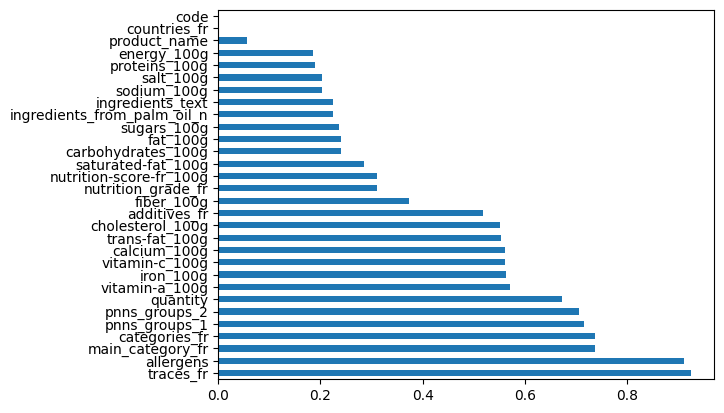

In [18]:
# Check for zero values for the final data set
df_food.isna().mean().sort_values(ascending=False).plot.barh()

### Sélection des produits francophone

In [19]:
# Replaces missing values with the empty string ("")
df_food["countries_fr"] = df_food["countries_fr"].fillna("")

In [20]:
# Check the countries_fr Saint-Martin
df_food.loc[df_food["countries_fr"].str.contains("Saint-Martin")]

,code,product_name,quantity,categories_fr,countries_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
201901,3228020160093,Lait Demi-Écrémé,1l,"Produits laitiers,Laits,Homogenized milks,Past...",Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253941,3760138824158,Épices caraïbes,NaN,NaN,Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320498,9501007301509,Penche KUBA,NaN,NaN,Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Instanciation of countries not french
other_countries = df_food.loc[~df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin"),["countries_fr"]].drop_duplicates()

In [22]:
# Check the all countries
other_countries["countries_fr"].unique()

array(['États-Unis', 'Royaume-Uni', 'Canada', 'Suisse', 'Espagne',
       'Allemagne', 'Slovénie', 'Italie', 'Roumanie', 'Australie',
       'Portugal', '', 'Royaume-Uni,États-Unis', 'Canada,États-Unis',
       'Pays-Bas', 'Irlande', 'Taiwan', 'Australie,Suisse', 'Brésil',
       'République dominicaine', 'États-Unis,en:Australie',
       'Arabie saoudite', 'Émirats arabes unis', 'Irak', 'Koweït',
       'Moldavie', 'Belgique', 'Singapour', 'Finlande',
       'Australie,États-Unis',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Panama', 'Costa Rica', 'Mexique', 'États-Unis,en:Pays-bas',
       'Espagne,Royaume-Uni,en:Scotland', 'Thaïlande', 'Chine',
       'Luxembourg', 'Liban', 'Suisse,États-Unis', 'Allemagne,États-Unis',
       'États-Unis,en:Deutschland', 'Belgique,Suisse,États-Unis',
       'Danemark,États-Unis,en:Spanien',
       'États-Unis,en:Belgie,en:Nederland', 'Belgique,Suisse',
       'Malaisie,États-Unis', 'Guyana,États-Unis', 'Serbie', 'Barba

In [23]:
# Data selection for French countries only
df_food_fr = df_food.loc[df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin")]

In [24]:
# Check the mean values per column
df_food_fr.isna().mean().sort_values(ascending=False)

trans-fat_100g                 0.996050
cholesterol_100g               0.995767
vitamin-a_100g                 0.994009
iron_100g                      0.987997
vitamin-c_100g                 0.986805
calcium_100g                   0.977126
traces_fr                      0.806108
allergens                      0.768555
additives_fr                   0.691335
fiber_100g                     0.537503
carbohydrates_100g             0.521894
fat_100g                       0.517479
ingredients_text               0.458213
ingredients_from_palm_oil_n    0.458213
nutrition-score-fr_100g        0.378670
nutrition_grade_fr             0.378670
main_category_fr               0.372265
categories_fr                  0.372265
saturated-fat_100g             0.368910
sugars_100g                    0.367455
sodium_100g                    0.366900
salt_100g                      0.366869
proteins_100g                  0.349037
energy_100g                    0.346239
pnns_groups_1                  0.342460


In [25]:
df_food_fr[df_food_fr["product_name"].isnull()]

,code,product_name,quantity,categories_fr,countries_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
48,0000000027205,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,NaN,NaN,Root-bier,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0000009336247,NaN,"46,7 g","Snacks sucrés,Confiseries,Bonbons",France,NaN,NaN,Œufs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,0000050157846,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,00003001,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320718,9688084817410,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320745,9800801107,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320746,9800895007,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,9800895250,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_food_fr = df_food_fr.dropna(subset="product_name")

## Analyse, nettoyage et préparation du dataset

### Selection des colonnes utiles pour la suite de l'analyse

In [27]:
df_food_fr.columns

Index(['code', 'product_name', 'quantity', 'categories_fr', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [28]:
df_food_fr[df_food_fr["quantity"].notnull()]["quantity"].unique()

array(['1kg', '2.46 kg', '1 kg ', ..., '1,25kg', '18,66kg', '67g'],
      dtype=object)

In [29]:
df_food_fr[df_food_fr["countries_fr"].notnull()]["countries_fr"]

0                    France
46                   France
106       France,États-Unis
136                  France
138       France,États-Unis
                ...        
320761               France
320763               France
320764               France
320765               France
320770               France
Name: countries_fr, Length: 91651, dtype: object

In [30]:
df_food_fr[df_food_fr["main_category_fr"].notnull()]["main_category_fr"].unique()

array(['Filet-de-boeuf', 'Aliments et boissons à base de végétaux',
       'Sablés', ..., 'en:Cremes-vegetales-a-base-de-coco-pour-cuisiner',
       'en:Malt-vinegar', 'Attieke'], dtype=object)

In [31]:
df_food_fr[df_food_fr["categories_fr"].notnull()]["categories_fr"].unique()

array(['Filet-de-boeuf',
       "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Légumineuses et dérivés,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles,Lentilles vertes",
       'Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés', ...,
       'Attieke,Manioc,Semoules-de-manioc',
       "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Pains,Biscottes,Biscottes-au-sarrasin",
       'Boissons,Boissons alcoolisées,Vins,Vins français,Vins blancs,Bugey'],
      dtype=object)

In [32]:
df_food_fr[df_food_fr["traces_fr"].notnull()]["traces_fr"].unique()

array(['Fruits à coque,Graines de sésame,Soja',
       'Œufs,Gluten,Lait,Moutarde,Fruits à coque,Graines de sésame,Soja,Anhydride sulfureux et sulfites',
       'Fruits à coque,Soja', ...,
       'Fabrique-sur-des-equipements-utilises-pour-le-traitement-de-produits-contenant-des-cacahuetes-et-diverses-varietes-de-noix',
       'Arachides,en:Tree-nut', 'Poisson,Gluten,Mollusques,Soja'],
      dtype=object)

In [33]:
columns_to_deleted = ["quantity","countries_fr","main_category_fr","categories_fr","traces_fr"]

In [34]:
df_food_fr = df_food_fr.drop(columns=columns_to_deleted)

### pnns_groups 1 & 2 - Analyse et correction des erreurs

In [35]:
df_food_fr.columns

Index(['code', 'product_name', 'ingredients_text', 'allergens', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [36]:
# Check the uniqus values 
df_food_fr["pnns_groups_1"].unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [37]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("unknown",np.nan)

In [38]:
df_food_fr[df_food_fr["pnns_groups_1"] == "cereals-and-potatoes"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218764,3270160019151,Haricots beurre,haricots beurre,NaN,NaN,0.0,NaN,cereals-and-potatoes,legumes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218773,3270160046201,Maïs doux en épis,maïs,NaN,NaN,0.0,a,cereals-and-potatoes,cereals,334.0,...,7.5,2.5,2.6,0.0,0.0,NaN,NaN,NaN,NaN,-3.0


In [39]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("cereals-and-potatoes","Cereals and potatoes")

In [40]:
df_food_fr[df_food_fr["pnns_groups_1"] == "fruits-and-vegetables"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
54668,0042272006304,Velouté de champignons,"Eau, champignons 30%, légumes 12% (oignons, po...","crème, beurre, céleri",NaN,0.0,c,fruits-and-vegetables,vegetables,197.0,...,0.5,0.5,1.0,0.7620,0.300000,NaN,NaN,NaN,NaN,4.0
66705,00595837,Champignons de Paris émincés épais,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,vegetables,79.0,...,0.0,2.1,2.2,0.7000,0.275591,NaN,NaN,NaN,NaN,0.0
175463,2000000005976,Mélange Persil/Ail coupé surgelé prêt à l'empl...,Persil et ail en proportion variable.,NaN,NaN,0.0,a,fruits-and-vegetables,vegetables,304.0,...,9.3,3.2,4.4,0.0508,0.020000,NaN,NaN,NaN,NaN,-9.0
175886,2000000021526,Champignons de Paris Pieds & Morceaux,"Champignons de Paris, eau, sel, acidifiant : a...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,vegetables,52.0,...,0.5,NaN,1.9,0.5500,0.216535,NaN,NaN,NaN,NaN,1.0
176961,20004088,"Champignons I. Wahl, ganze Köpfe","Champignons, Wasser, Speisesalz, Säuerungsmitt...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,vegetables,82.0,...,0.1,NaN,2.3,0.7000,0.275591,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313349,8710438089998,Mini Smile' Up,"Pommes de terre, pommes de terre déshydratées,...",NaN,E464 - Hydroxypropylméthylcellulose,0.0,a,fruits-and-vegetables,vegetables,932.0,...,0.5,3.9,3.3,0.5000,0.196850,NaN,NaN,NaN,NaN,-8.0
313357,8710438097979,Potatoes à Rôtir - Ail et persil,"Pommes de terre (90,5%), enrobage (5%) : farin...","blé, blé",NaN,0.0,a,fruits-and-vegetables,vegetables,573.0,...,0.5,3.0,2.5,0.5000,0.196850,NaN,NaN,NaN,NaN,-7.0
313542,8710609310326,Champignons de Paris,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,NaN,fruits-and-vegetables,vegetables,76.0,...,NaN,NaN,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314818,8713021211110,Champignons Blancs de Paris,NaN,NaN,NaN,NaN,NaN,fruits-and-vegetables,vegetables,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("fruits-and-vegetables","Fruits and vegetables")

In [42]:
df_food_fr[df_food_fr["pnns_groups_1"] == "sugary-snacks"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
66153,00561112,Iced & Spiced Soft Bun,Farine de blé (contient _Gluten_) (avec Farine...,"Gluten, Gluten, Gluten","E170 - Carbonate de calcium,E375 - Acide nicot...",1.0,c,sugary-snacks,pastries,1276.0,...,36.0,2.2,4.9,0.33000,0.129921,NaN,NaN,NaN,NaN,9.0
112689,0201292018371,Pain chocolat (x 5),"Farine de blé, beurre 22%, lait demi-écrémé pa...",NaN,E322 - Lécithines,0.0,NaN,sugary-snacks,pastries,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112764,0202446006565,Chouquette x10,"_Oeufs_ entiers, eau, farine de _blé_, _beurre...","Oeufs, blé, beurre","E160a - Bêta-carotène,E450i - Pyrophosphate de...",0.0,NaN,sugary-snacks,pastries,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112772,0202577010172,Croissants,"Croissant 96 % (farine de _blé_*, _beurre_* 22...","blé, beurre, oeufs, blé, oeufs",E300 - Acide ascorbique,0.0,d,sugary-snacks,pastries,1835.0,...,7.2,2.2,7.5,1.08000,0.425197,NaN,NaN,NaN,NaN,17.0
112773,0202581010823,Pains au chocolat,NaN,NaN,NaN,NaN,d,sugary-snacks,pastries,1815.0,...,11.0,2.8,8.4,0.90000,0.354331,NaN,NaN,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311667,8480017081896,Pains au chocolat (x 10) 450 g - Dia,"farine de _blé_, huiles végétales (palme, colz...","blé, soja, beurre, gluten, blé, lait","E322 - Lécithines,E471 - Mono- et diglycérides...",1.0,e,sugary-snacks,pastries,1726.0,...,19.2,NaN,6.3,1.25984,0.496000,NaN,NaN,NaN,NaN,24.0
311668,8480017081902,Croissants (x 10) 400 g - Dia,"Farine de blé, huiles végétales (palme, colza)...",NaN,E471 - Mono- et diglycérides d'acides gras ali...,1.0,e,sugary-snacks,pastries,1709.0,...,7.3,NaN,6.2,1.30048,0.512000,NaN,NaN,NaN,NaN,21.0
311916,8480017311498,Brioche tranchée pur beurre,"Farine de _blé_, sucre, _oeufs_ entiers liquid...","blé, oeufs, beurre, beurre, gluten, blé",E471 - Mono- et diglycérides d'acides gras ali...,0.0,d,sugary-snacks,pastries,1457.0,...,14.0,NaN,7.6,0.84000,0.330709,NaN,NaN,NaN,NaN,16.0
318568,91260369,Gâche,"Farine de blé, œufs frais, sucre, beurre* 12,7...",NaN,NaN,0.0,e,sugary-snacks,pastries,1634.0,...,16.2,NaN,8.9,0.91000,0.358268,NaN,NaN,NaN,NaN,20.0


In [43]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("sugary-snacks","Sugary snacks")

In [44]:
df_food_fr[df_food_fr["pnns_groups_1"].isnull()]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,"Milk chocolate coating (evaporated cane juice,...",NaN,E322 - Lécithines,0.0,e,NaN,unknown,1883.0,...,57.50,2.5,2.50,0.09652,0.03800,NaN,NaN,0.1,0.00090,22.0
136,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,Pack de 2 Twix,NaN,NaN,NaN,NaN,NaN,NaN,unknown,1481.0,...,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,0.00075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320757,9900000000233,Amandes,NaN,NaN,NaN,NaN,b,NaN,NaN,2406.0,...,3.89,12.2,21.22,0.10000,0.03937,NaN,NaN,NaN,NaN,0.0
320760,99044169,Poireaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,Roussette du Bugey (2011),NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic beverages,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Check the unique values
df_food_fr["pnns_groups_2"].unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products', 'Cheese',
       'Sweets', 'Sandwich', 'Appetizers', 'Dressings and sauces',
       'Dried fruits', 'Nuts', 'Breakfast cereals',
       'Pizza pies and quiche', 'Fruits', 'Fruit juices', 'Fats',
       'Alcoholic beverages', 'Cereals', 'Vegetables', 'Bread',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Eggs',
       'Potatoes', 'Salty and fatty products', 'fruits', 'legumes',
       'cereals'], dtype=object)

In [46]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("fruits", "Fruits")

In [47]:
df_food_fr[df_food_fr["pnns_groups_2"] == "legumes"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218764,3270160019151,Haricots beurre,haricots beurre,NaN,NaN,0.0,NaN,Cereals and potatoes,legumes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("legumes", "Legumes")

In [49]:
df_food_fr[df_food_fr["pnns_groups_2"] == "vegetables"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
54668,0042272006304,Velouté de champignons,"Eau, champignons 30%, légumes 12% (oignons, po...","crème, beurre, céleri",NaN,0.0,c,Fruits and vegetables,vegetables,197.0,...,0.5,0.5,1.0,0.7620,0.300000,NaN,NaN,NaN,NaN,4.0
66705,00595837,Champignons de Paris émincés épais,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,Fruits and vegetables,vegetables,79.0,...,0.0,2.1,2.2,0.7000,0.275591,NaN,NaN,NaN,NaN,0.0
175463,2000000005976,Mélange Persil/Ail coupé surgelé prêt à l'empl...,Persil et ail en proportion variable.,NaN,NaN,0.0,a,Fruits and vegetables,vegetables,304.0,...,9.3,3.2,4.4,0.0508,0.020000,NaN,NaN,NaN,NaN,-9.0
175886,2000000021526,Champignons de Paris Pieds & Morceaux,"Champignons de Paris, eau, sel, acidifiant : a...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,Fruits and vegetables,vegetables,52.0,...,0.5,NaN,1.9,0.5500,0.216535,NaN,NaN,NaN,NaN,1.0
176961,20004088,"Champignons I. Wahl, ganze Köpfe","Champignons, Wasser, Speisesalz, Säuerungsmitt...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,Fruits and vegetables,vegetables,82.0,...,0.1,NaN,2.3,0.7000,0.275591,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313349,8710438089998,Mini Smile' Up,"Pommes de terre, pommes de terre déshydratées,...",NaN,E464 - Hydroxypropylméthylcellulose,0.0,a,Fruits and vegetables,vegetables,932.0,...,0.5,3.9,3.3,0.5000,0.196850,NaN,NaN,NaN,NaN,-8.0
313357,8710438097979,Potatoes à Rôtir - Ail et persil,"Pommes de terre (90,5%), enrobage (5%) : farin...","blé, blé",NaN,0.0,a,Fruits and vegetables,vegetables,573.0,...,0.5,3.0,2.5,0.5000,0.196850,NaN,NaN,NaN,NaN,-7.0
313542,8710609310326,Champignons de Paris,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,NaN,Fruits and vegetables,vegetables,76.0,...,NaN,NaN,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314818,8713021211110,Champignons Blancs de Paris,NaN,NaN,NaN,NaN,NaN,Fruits and vegetables,vegetables,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("vegetables", "Vegetables")

In [51]:
df_food_fr[df_food_fr["pnns_groups_2"] == "cereals"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218773,3270160046201,Maïs doux en épis,maïs,NaN,NaN,0.0,a,Cereals and potatoes,cereals,334.0,...,7.5,2.5,2.6,0.0,0.0,NaN,NaN,NaN,NaN,-3.0


In [52]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("cereals", "Cereals")

In [53]:
df_food_fr[df_food_fr["pnns_groups_2"] == "unknown"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
46,0000000024600,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,"Milk chocolate coating (evaporated cane juice,...",NaN,E322 - Lécithines,0.0,e,NaN,unknown,1883.0,...,57.5,2.5,2.50,0.09652,0.038000,NaN,NaN,0.1,0.00090,22.0
136,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,Pack de 2 Twix,NaN,NaN,NaN,NaN,NaN,NaN,unknown,1481.0,...,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,0.00075,NaN
189,0000010127735,Sirops pour ganache macarons,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,"E330 - Acide citrique,E171 - Oxyde de titane,E...",0.0,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320670,9588400178181,Cacao,NaN,NaN,NaN,NaN,c,NaN,unknown,1568.0,...,68.0,6.4,5.70,0.06000,0.023622,NaN,NaN,NaN,NaN,10.0
320685,96083291,Malt vinegar,"Barley malt vinegar, barley malt extract",NaN,NaN,0.0,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320696,96095065,OBF,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320736,9780201379129,Attiéké,semoule de manioc,NaN,NaN,0.0,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("unknown",np.nan)

## Outliers

### Analyse

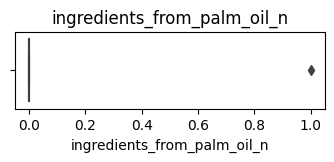

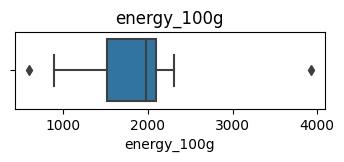

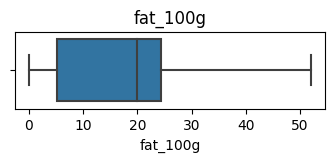

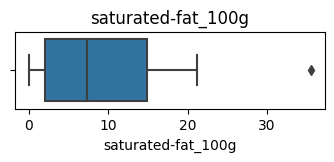

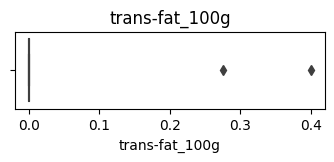

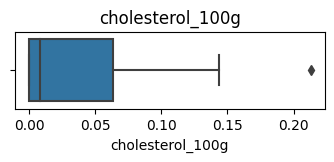

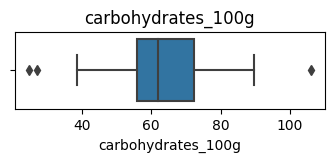

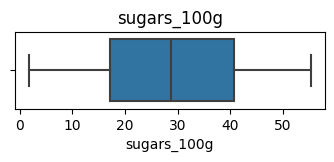

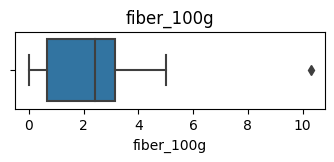

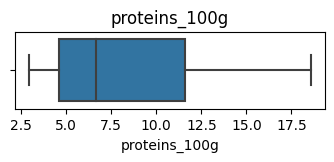

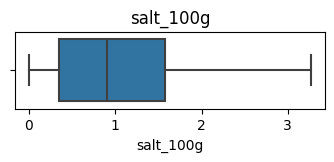

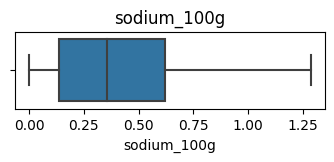

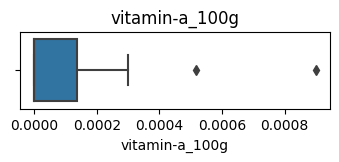

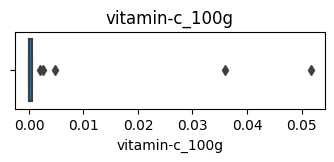

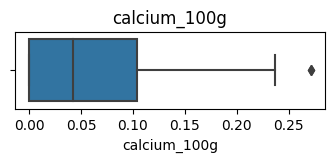

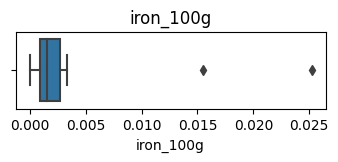

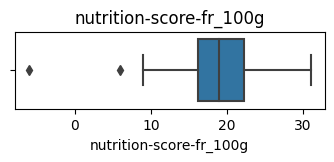

In [55]:
for col in df_food_fr.columns:
    if df_food_fr[col].dtype == "float":
        plt.figure(figsize=(4, 1))
        sns.boxplot(data=df_food_fr.dropna(), x=col, y=None)
        plt.title(col)
        plt.show()
    else:
        continue

In [56]:
"""sns.pairplot(df_food_fr)"""

'sns.pairplot(df_food_fr)'

### Normalisation théorique

#### Colonnes 100g

In [57]:
nutrition_columns = df_food_fr.columns[df_food_fr.columns.str.contains("_100g") & ~df_food_fr.columns.str.contains("^energy_100g")]

In [58]:
for col in nutrition_columns:
    df_food_fr.loc[df_food_fr[col] > 100, col] = np.nan

#### Autres colonnes

In [59]:
df_food_fr["ingredients_from_palm_oil_n"].unique()

array([nan,  0.,  1.,  2.])

In [60]:
# Remplacer les valeurs par un booléen
df_food_fr.loc[df_food_fr["ingredients_from_palm_oil_n"] > 0, "ingredients_from_palm_oil_n"] = True
df_food_fr.loc[(df_food_fr["ingredients_from_palm_oil_n"] == 0) | (df_food_fr["ingredients_from_palm_oil_n"].isnull()), "ingredients_from_palm_oil_n"] = False

In [61]:
# Remplacement des valeurs supérieur à 3800 KJ (max contenu dans 100g de lipides)
for i in df_food_fr["energy_100g"]:
    if i > 3800:
        df_food_fr["energy_100g"] = df_food_fr["energy_100g"].replace(i,np.nan)

In [62]:
# Mise en majuscule des valeurs
df_food_fr["nutrition_grade_fr"] = df_food_fr["nutrition_grade_fr"].str.upper()

In [63]:
df_food_fr.loc[df_food_fr["additives_fr"].notnull(), "additives_fr"] = True
df_food_fr.loc[df_food_fr["additives_fr"].isnull(), "additives_fr"] = False

### **Outliers - saturated-fat_100g et fat_100g**

Relation entre les graisses saturées et les graisses :
Les graisses saturées font partie du groupe plus large des graisses. En conséquence, lorsque l'on parle de la relation entre les graisses saturées et les graisses, on se réfère généralement à la proportion de graisses saturées dans l'apport total en graisses.

<Axes: xlabel='fat_100g', ylabel='saturated-fat_100g'>

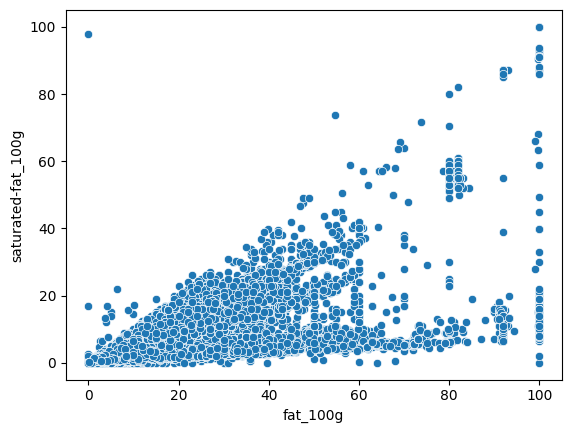

In [64]:
sns.scatterplot(data=df_food_fr, y="saturated-fat_100g", x="fat_100g")

In [65]:
df_food_fr.loc[df_food_fr["saturated-fat_100g"] > df_food_fr["fat_100g"],["saturated-fat_100g", "fat_100g"]] = np.nan

<Axes: xlabel='fat_100g', ylabel='saturated-fat_100g'>

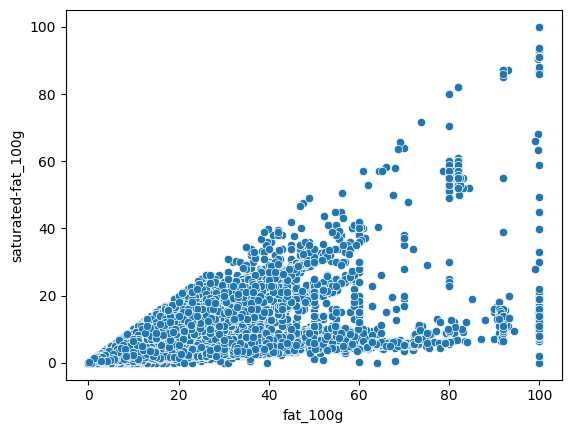

In [66]:
sns.scatterplot(data=df_food_fr, y="saturated-fat_100g", x="fat_100g")

In [67]:
# Suppression de la colonne sodium
df_food_fr = df_food_fr.drop(columns="saturated-fat_100g", axis=1)

### **Outliers - salt_100g et sodium_100g**

Le sodium est le composant du sel qui est lié aux problèmes de santé (consommation excessive de sel)
Lorsque vous regardez la teneur en sodium dans les aliments, il est important de prendre en compte la quantité totale de sel consommée, car environ **40 % du poids du sel est constitué de sodium**. *Par exemple, si un aliment 1 000 mg de sodium, cela équivaut à environ 2 500 mg de sel (1 000 mg de sodium / 0,4).*

<Axes: xlabel='sodium_100g', ylabel='salt_100g'>

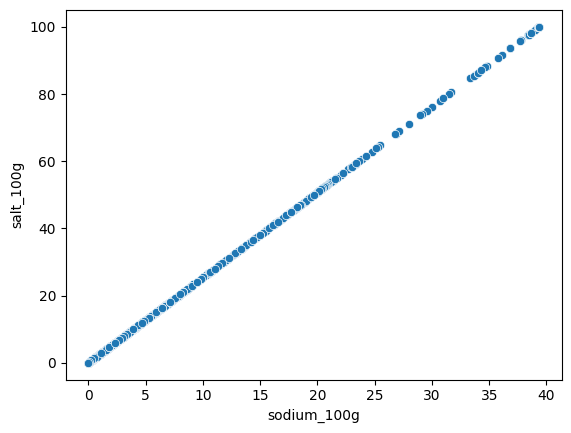

In [68]:
sns.scatterplot(data=df_food_fr,y='salt_100g',x="sodium_100g")

In [69]:
# Suppression de la colonne sodium
df_food_fr = df_food_fr.drop(columns="sodium_100g", axis=1)

### **Outliers - carbohydrates_100g et sugars_100g**

Dans la littérature scientifique, il existe une relation étroite entre les hydrates de carbone et le sucre. En fait, les hydrates de carbone, également appelés glucides, sont un groupe de macronutriments qui comprennent les sucres simples (monosaccharides), les sucres doubles (disaccharides) et les sucres complexes (polysaccharides). Le sucre, dans le contexte courant, fait référence principalement aux sucres simples tels que le glucose, le fructose et le saccharose.

Il est important de noter que les hydrates de carbone sont une source essentielle d'énergie pour notre corps, et les sucres simples sont rapidement disponibles pour être utilisés comme carburant. Cependant, une consommation excessive de sucres simples peut être problématique pour la santé, car elle peut contribuer à des problèmes tels que l'obésité, le diabète de type 2 et les maladies cardiovasculaires.

<Axes: xlabel='carbohydrates_100g', ylabel='sugars_100g'>

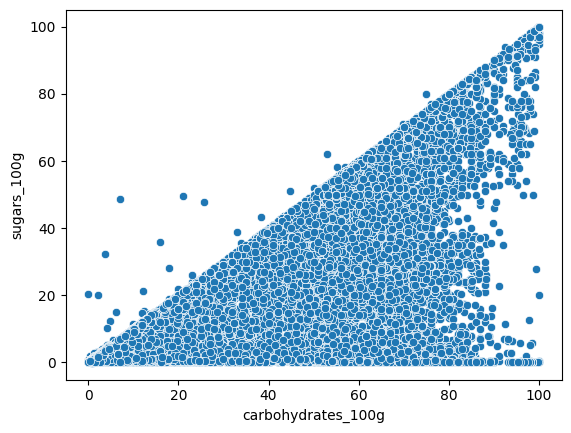

In [70]:
sns.scatterplot(data=df_food_fr,x="carbohydrates_100g",y="sugars_100g")

In [71]:
df_food_fr.loc[df_food_fr["sugars_100g"] > df_food_fr["carbohydrates_100g"],["sugars_100g", "carbohydrates_100g"]] = np.nan

<Axes: xlabel='carbohydrates_100g', ylabel='sugars_100g'>

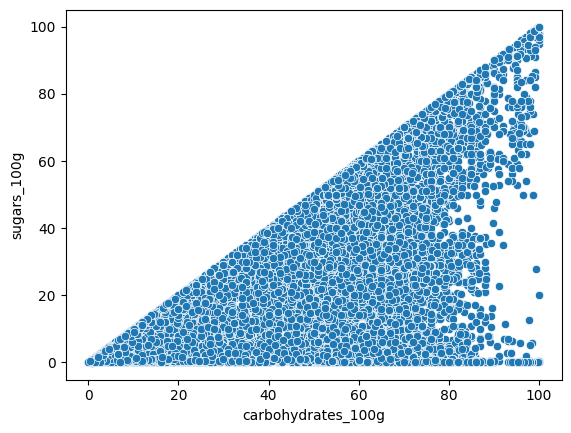

In [72]:
sns.scatterplot(data=df_food_fr, x="carbohydrates_100g", y="sugars_100g")

In [76]:
# Suppression de la colonne sodium
df_food_fr = df_food_fr.drop(columns="trans-fat_100g", axis=1)

## Outliers - fiber_100g

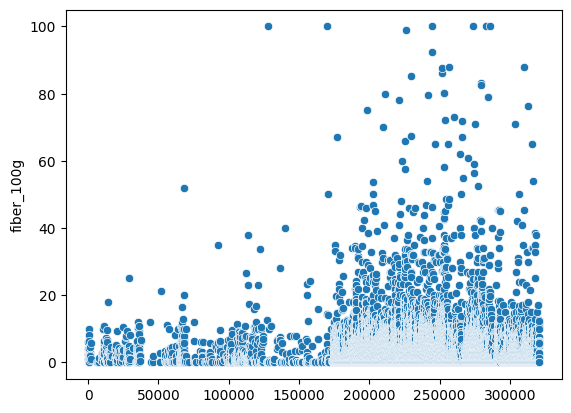

In [86]:
sns.scatterplot(df_food_fr["fiber_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [74]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["fiber_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["fiber_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["fiber_100g"])[(pd.Series(df_food_fr["fiber_100g"]) < borne_inf) | (pd.Series(df_food_fr["fiber_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
495                   10.0
597                    8.3
10375                  9.9
11179                 11.0
13424                  9.7
...                    ...
320532                10.5
320534                11.8
320535                10.6
320741                10.0
320757                12.2

[2913 rows x 1 columns]


## Outliers - proteins_100g

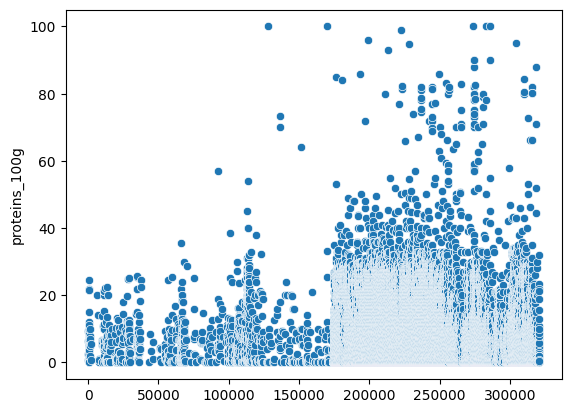

In [75]:
sns.scatterplot(df_food_fr["proteins_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [76]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["proteins_100g"])[(pd.Series(df_food_fr["proteins_100g"]) < borne_inf) | (pd.Series(df_food_fr["proteins_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
28476                 24.9
29113                 25.0
34626                 25.3
34632                 25.6
59306                 25.3
...                    ...
318230                70.9
318627                88.0
319192                28.2
319193                30.0
320309                32.0

[2545 rows x 1 columns]


In [77]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["vitamin-c_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["vitamin-c_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["vitamin-c_100g"])[(pd.Series(df_food_fr["vitamin-c_100g"]) < borne_inf) | (pd.Series(df_food_fr["vitamin-c_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
13161               0.0745
161015              7.5000
161016              3.0000
174641              0.1000
176140              0.1500
...                    ...
292548              0.0650
295141              0.0800
301304              0.0680
306601              0.0930
320556              0.0850

[140 rows x 1 columns]


### Outliers - Vitamines

In [78]:
'''plt.figure(figsize=(50,50))
sns.pairplot(df_food_fr)'''

'plt.figure(figsize=(50,50))\nsns.pairplot(df_food_fr)'

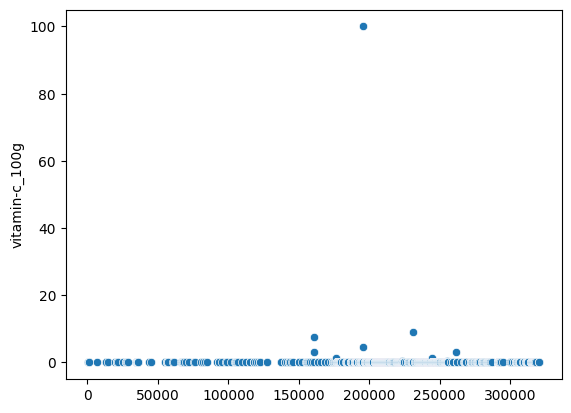

In [79]:
sns.scatterplot(df_food_fr["vitamin-c_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [80]:
df_food_fr[df_food_fr["vitamin-c_100g"] > 80][["product_name","vitamin-c_100g"]]

,product_name,vitamin-c_100g
195747,Juvamine Vitamine C500 à croquer sans sucres,100.0


In [81]:
df_food_fr[df_food_fr["vitamin-c_100g"] < 80][["product_name","vitamin-c_100g"]].sort_values("vitamin-c_100g",ascending=False)

,product_name,vitamin-c_100g
231048,Centrum Men,9.02
161015,"Coconut Liquid Water Enhancer, Original",7.50
195726,Junior Vitamine C & Calcium goût Fraise à croquer,4.71
261524,CitroBiotic,3.00
161016,Liquid Water Enhancer,3.00
...,...,...
150141,"4 petits carrés a 3 étages au beurre, pointe d...",0.00
155124,Sirop d'érable pur,0.00
60623,S.Pellegrino,0.00
156398,Vivaloé Honeydew Aloe,0.00


In [82]:
df_food_fr["vitamin-c_100g"].dtypes

dtype('float64')

### Outliers - Iron

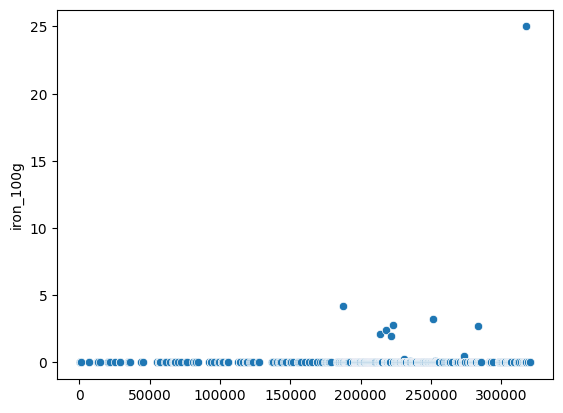

In [83]:
sns.scatterplot(df_food_fr["iron_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

## Remplacement des valeurs null

In [84]:
df_food_fr["main_category_fr"].unique()

KeyError: 'main_category_fr'

In [67]:
df_food_fr.duplicated()

0         False
46        False
106       False
136       False
138       False
          ...  
320761    False
320763    False
320764    False
320765    False
320770    False
Length: 91651, dtype: bool